In [1]:
%pip install emcee
%pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from importlib import reload
import tqdm
import time
import copy
import emcee
from google.colab import files

In [3]:
def Ising(L):
  # initialize model
  return sps.bernoulli.rvs(0.5, size=(L,L))*2-1

def flip(A, beta, i, j):
  # A: ising model; (i,j): flip position; beta: 1/(k_BT)
  L = len(A)
  sigma = A[(i+1)%L, j] + A[(i-1)%L, j] + A[i, (j+1)%L] + A[i, (j-1)%L] # sum up neighbours
  prob = np.exp(beta*sigma)/(np.exp(beta*sigma)+np.exp(-beta*sigma)) # prob of flip to 1
  if np.random.random() < prob:
    A[i,j] = 1
  else:
    A[i,j] = -1
  return A

In [5]:
def random_ising(L, beta, max_itr): # flip randomly
  his = np.zeros(max_itr)
  A = Ising(L) # initialize model
  pos = np.random.randint(0, L, (2, max_itr)) # generate random position
  for i in range(max_itr):
    A = flip(A, beta, pos[0,i], pos[1,i]) # flip position
    his[i] = np.sum(A)
  return his

def deterministic_ising(L, beta, max_itr): # sweep through the lattice deterministically
  his = np.zeros(max_itr)
  A = Ising(L) # initialize model
  for i in range(max_itr):
    A = flip(A, beta, i%L, i%(L*L)//L) # flip position
    his[i] = np.sum(A)
  return his

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

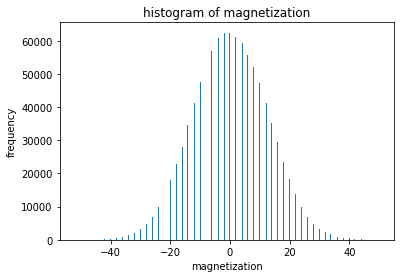

In [ ]:
L = 10
beta = 0.1
max_itr = 10**6
his1 = random_ising(L, beta, max_itr)
# plot histogram
plt.hist(his1, bins = 'auto')
plt.title('histogram of magnetization')
plt.xlabel('magnetization')
plt.ylabel('frequency')
plt.savefig("his1_0.1.png")
files.download("his1_0.1.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

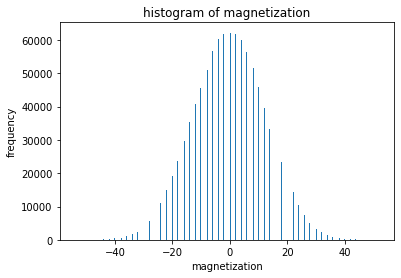

In [ ]:
L = 10
beta = 0.1
max_itr = 10**6
his2 = deterministic_ising(L, beta, max_itr)
# plot histogram
plt.hist(his2, bins = 'auto')
plt.title('histogram of magnetization')
plt.xlabel('magnetization')
plt.ylabel('frequency')
plt.savefig("his2_0.1.png")
files.download("his2_0.1.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

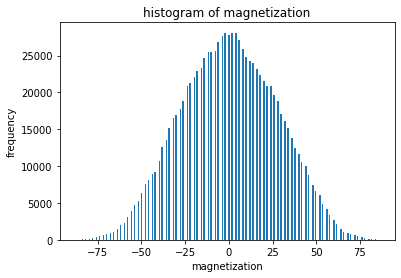

In [ ]:
L = 10
beta = 0.3
max_itr = 10**6
his1 = random_ising(L, beta, max_itr)
# plot histogram
plt.hist(his1, bins = 'auto')
plt.title('histogram of magnetization')
plt.xlabel('magnetization')
plt.ylabel('frequency')
plt.savefig("his1_0.3.png")
files.download("his1_0.3.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

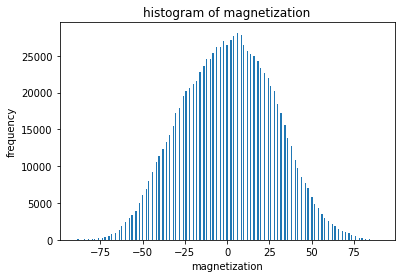

In [ ]:
L = 10
beta = 0.3
max_itr = 10**6
his1 = deterministic_ising(L, beta, max_itr)
# plot histogram
plt.hist(his1, bins = 'auto')
plt.title('histogram of magnetization')
plt.xlabel('magnetization')
plt.ylabel('frequency')
plt.savefig("his2_0.3.png")
files.download("his2_0.3.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

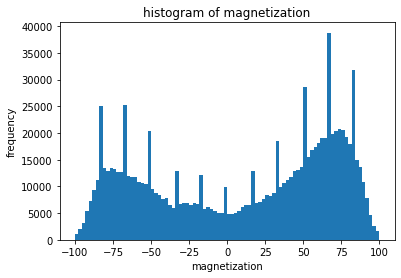

In [ ]:
L = 10
beta = 0.4
max_itr = 10**6
his1 = random_ising(L, beta, max_itr)
# plot histogram
plt.hist(his1, bins = 'auto')
plt.title('histogram of magnetization')
plt.xlabel('magnetization')
plt.ylabel('frequency')
plt.savefig("his1_0.4.png")
files.download("his1_0.4.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

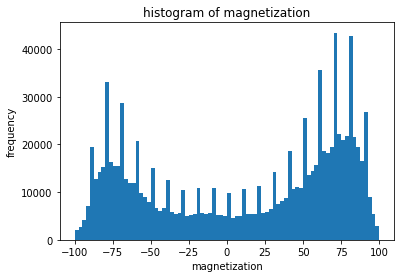

In [ ]:
L = 10
beta = 0.4
max_itr = 10**6
his2 = deterministic_ising(L, beta, max_itr)
# plot histogram
plt.hist(his2, bins = 'auto')
plt.title('histogram of magnetization')
plt.xlabel('magnetization')
plt.ylabel('frequency')
plt.savefig("his2_0.4.png")
files.download("his2_0.4.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

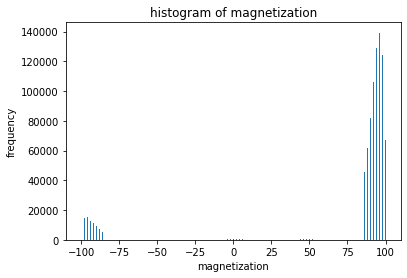

In [6]:
L = 10
beta = 0.5
max_itr = 10**6
his1 = random_ising(L, beta, max_itr)
# plot histogram
plt.hist(his1, bins = 'auto')
plt.title('histogram of magnetization')
plt.xlabel('magnetization')
plt.ylabel('frequency')
plt.savefig("his1_0.5.png")
files.download("his1_0.5.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

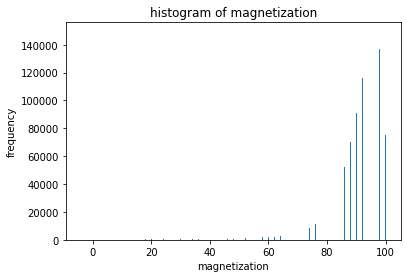

In [8]:
L = 10
beta = 0.5
max_itr = 10**6
his2 = deterministic_ising(L, beta, max_itr)
# plot histogram
plt.hist(his2, bins = 'auto')
plt.title('histogram of magnetization')
plt.xlabel('magnetization')
plt.ylabel('frequency')
plt.savefig("his2_0.5.png")
files.download("his2_0.5.png")
plt.show()

In [ ]:
beta_list = [0.1]
lattice_list = [5, 10, 15, 20, 25, 30]
max_itr = 10**6
his_matrix1 = np.zeros((len(beta_list), len(lattice_list)))
for i in range(len(beta_list)):
  for j in range(len(lattice_list)):
    history = random_ising(lattice_list[j], beta_list[i], max_itr)
    his_matrix1[i,j] = emcee.autocorr.integrated_time(history, quiet=True)
l1 = his_matrix1[0]
print(l1)

[  78.77384093  312.05386433  714.40460099 1012.1067968  1887.31876268
 2732.3757656 ]


In [ ]:
beta_list = [0.1]
lattice_list = [5, 10, 15, 20, 25, 30]
max_itr = 10**6
his_matrix2 = np.zeros((len(beta_list), len(lattice_list)))
for i in range(len(beta_list)):
  for j in range(len(lattice_list)):
    history = deterministic_ising(lattice_list[j], beta_list[i], max_itr)
    his_matrix2[i,j] = emcee.autocorr.integrated_time(history, quiet=True)
l2 = his_matrix2[0]
print(l2)

[  41.45836737  190.79359556  347.59365397  619.62224946 1065.25213614
 1536.18048108]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

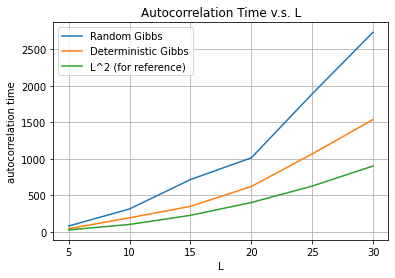

In [ ]:
plt.plot(np.array(lattice_list), l1, label = "Random Gibbs")
plt.plot(np.array(lattice_list), l2, label = "Deterministic Gibbs")
plt.plot(np.array(lattice_list), np.array(lattice_list)**2, label = "L^2 (for reference)")
plt.title('Autocorrelation Time v.s. L')
plt.xlabel('L')
plt.ylabel('autocorrelation time')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("AvsL1.png")
files.download("AvsL1.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

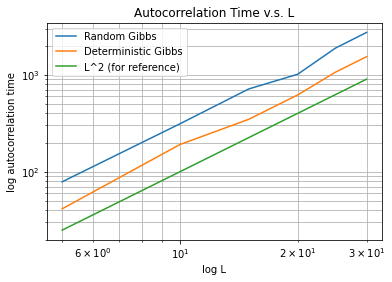

In [ ]:
plt.plot(np.array(lattice_list), l1, label = "Random Gibbs")
plt.plot(np.array(lattice_list), l2, label = "Deterministic Gibbs")
plt.plot(np.array(lattice_list), np.array(lattice_list)**2, label = "L^2 (for reference)")
plt.title('Autocorrelation Time v.s. L')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log L')
plt.ylabel('log autocorrelation time')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("AvsL2.png")
files.download("AvsL2.png")
plt.show()

In [ ]:
beta_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
lattice_list = [10]
max_itr = 10**6
his_matrix3 = np.zeros((len(beta_list), len(lattice_list)))
for i in range(len(beta_list)):
  for j in range(len(lattice_list)):
    history = random_ising(lattice_list[j], beta_list[i], max_itr)
    his_matrix3[i,j] = emcee.autocorr.integrated_time(history, quiet=True)
l3 = his_matrix3[:,0]
print(l3)

N/50 = 20000;
tau: [24283.95517463]


[  293.94548858   675.07935181  2583.17652659 24283.95517463
  1143.04211919   599.6010048   1761.21638514  5569.83678075]


In [ ]:
beta_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
lattice_list = [10]
max_itr = 10**6
his_matrix4 = np.zeros((len(beta_list), len(lattice_list)))
for i in range(len(beta_list)):
  for j in range(len(lattice_list)):
    history = deterministic_ising(lattice_list[j], beta_list[i], max_itr)
    his_matrix4[i,j] = emcee.autocorr.integrated_time(history, quiet=True)
l4 = his_matrix4[:,0]
print(l4)

N/50 = 20000;
tau: [74802.75859826]


[  160.79677756   339.90970752  1269.43753044 10428.85930701
 74802.75859826   346.69430976  1137.55147253   262.75012271]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

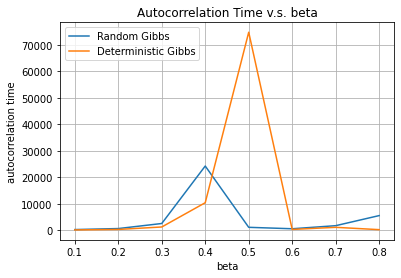

In [ ]:
plt.plot(beta_list, l3, label = "Random Gibbs")
plt.plot(beta_list, l4, label = "Deterministic Gibbs")
plt.title('Autocorrelation Time v.s. beta')
plt.xlabel('beta')
plt.ylabel('autocorrelation time')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("Avsb1.png")
files.download("Avsb1.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

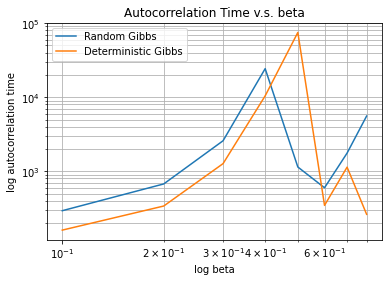

In [ ]:
plt.plot(beta_list, l3, label = "Random Gibbs")
plt.plot(beta_list, l4, label = "Deterministic Gibbs")
plt.title('Autocorrelation Time v.s. beta')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log beta')
plt.ylabel('log autocorrelation time')
plt.grid(visible=True, which='both', axis='both')
plt.savefig("Avsb2.png")
files.download("Avsb2.png")
plt.legend()
plt.show()

In [ ]:
beta1 = 0.1
beta2 = 0.5
hist1 = deterministic_ising(10, beta1, 10**6)
hist2 = deterministic_ising(10, beta2, 10**6)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

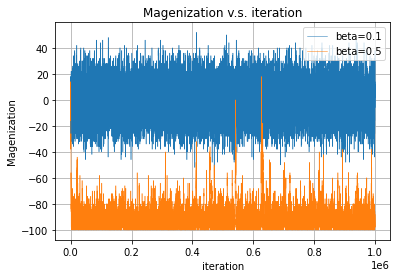

In [ ]:
max_itr = 10**6
bin = [i for i in range(max_itr)]
plt.plot(bin, hist1, label = "beta=0.1", linewidth=0.5)
plt.plot(bin, hist2, label = "beta=0.5", linewidth=0.5)
plt.title('Magenization v.s. iteration')
plt.xlabel('iteration')
plt.ylabel('Magenization')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("b1b2.png")
files.download("b1b2.png")
plt.show()

In [10]:
def flip_Metropolis(A, beta, i, j):
  L = len(A)
  sigma = A[(i+1)%L,j]+A[(i-1)%L,j]+A[i,(j+1)%L]+A[i,(j-1)%L] # sum up neighbours
  p = np.min([1, np.exp(-2*beta*A[i,j]*sigma)])
  if np.random.random() < p: # with prob p, accept the flip
    A[i,j] *= -1 # flip the entry
  return A

def Metropolis(L, beta, max_itr=10**5): # Metropolis-Hasting for Ising model
  # max_itr = 10**5
  his = np.zeros(max_itr)
  A = Ising(L) # initialize model
  pos = np.random.randint(0, L, (2, max_itr)) # random flip position
  for itr in range(max_itr):
    A = flip_Metropolis(A, beta, pos[0,itr], pos[1,itr])
    his[itr] = np.sum(A)
  return his

In [ ]:
beta_list = [0.1]
lattice_list = [5, 10, 15, 20, 25, 30]
max_itr = 10**6
his_matrix5 = np.zeros((len(beta_list), len(lattice_list)))
for i in range(len(beta_list)):
  for j in range(len(lattice_list)):
    history = Metropolis(lattice_list[j], beta_list[i], max_itr)
    his_matrix5[i,j] = emcee.autocorr.integrated_time(history, quiet=True)
l5 = his_matrix5[0]
print(l5)

[  45.50647601  183.18352253  363.87527562  661.80821456 1291.18721674
 1906.35153163]


In [ ]:
beta_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
lattice_list = [10]
max_itr = 10**6
his_matrix6 = np.zeros((len(beta_list), len(lattice_list)))
for i in range(len(beta_list)):
  for j in range(len(lattice_list)):
    history = Metropolis(lattice_list[j], beta_list[i], max_itr)
    his_matrix6[i,j] = emcee.autocorr.integrated_time(history, quiet=True)
l6 = his_matrix6[:,0]
print(l6)

[ 178.17069858  422.94544161 1147.58210331 9130.37144853 1173.75928605
 1020.37790539  509.87164057  308.18761642]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

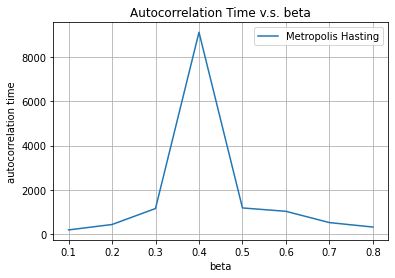

In [13]:
plt.plot(beta_list, l6, label = "Metropolis Hasting")
plt.title('Autocorrelation Time v.s. beta')
plt.xlabel('beta')
plt.ylabel('autocorrelation time')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("Avsb3.png")
files.download("Avsb3.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

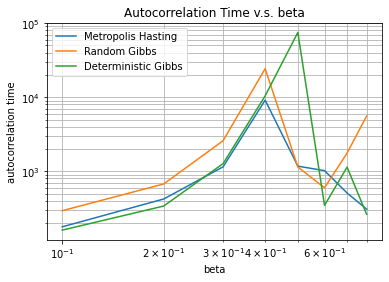

In [14]:
plt.plot(beta_list, l6, label = "Metropolis Hasting")
plt.plot(beta_list, l3, label = "Random Gibbs")
plt.plot(beta_list, l4, label = "Deterministic Gibbs")
plt.title('Autocorrelation Time v.s. beta')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('beta')
plt.ylabel('autocorrelation time')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("Avsb4.png")
files.download("Avsb4.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

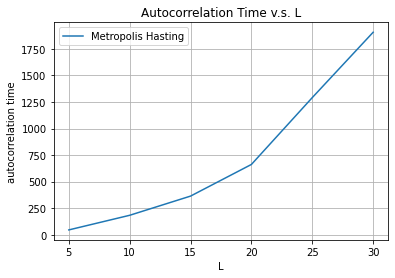

In [23]:
plt.plot(np.array(lattice_list), l5, label = "Metropolis Hasting")
plt.title('Autocorrelation Time v.s. L')
plt.xlabel('L')
plt.ylabel('autocorrelation time')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("AvsL3.png")
files.download("AvsL3.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

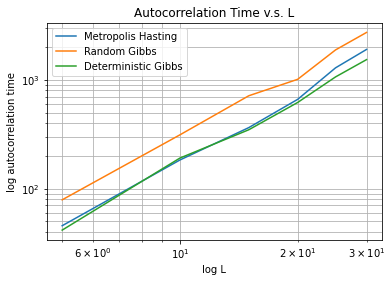

In [24]:
plt.plot(np.array(lattice_list), l5, label = "Metropolis Hasting")
plt.plot(np.array(lattice_list), l1, label = "Random Gibbs")
plt.plot(np.array(lattice_list), l2, label = "Deterministic Gibbs")
plt.title('Autocorrelation Time v.s. L')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log L')
plt.ylabel('log autocorrelation time')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("AvsL4.png")
files.download("AvsL4.png")
plt.show()

In [5]:
def density(A, beta): # compute density at A, up to normalizing constant
  den = 0
  L = len(A)
  for i in range(L):
    for j in range(L):
      den += (A[(i+1)%L,j]+A[(i-1)%L,j]+A[i,(j+1)%L]+A[i,(j-1)%L])*A[i,j]
  return np.exp(den*beta/2)

def Jarzynski(L, beta, N, M, resample = False):
  ensemble = [Ising(L) for i in range(M)] # generate samples from beta=0
  W = np.ones(M)/M
  for k in range(N): # loop over interpolation steps
    for i in range(M): # loop over the sample
      for j in range(L*L): # to accelerate muxing, update L*L times
        ensemble[i] = flip_Metropolis(ensemble[i], beta*k/N, np.random.randint(0, L), np.random.randint(0, L))
      W[i] *= density(ensemble[i], beta/N)
    W /= np.sum(W) # normalizing weight
    if resample == True:
      index = systematic(W)
      ensemble_new = [ensemble[i] for i in index]
      ensemble = ensemble_new
      W = np.ones(M)/M
  magne = [np.sum(A) for A in ensemble]
  return np.dot(W, magne) # compute the weighted average of magnetization using ensemble

In [13]:
# evaluate variance without resampling
L = 5
beta = 0.2
N_list = [2, 3, 5, 7, 10, 15] # list of N
M = 100 # number of samples in ensemble
sample = 500 # number of runs to calculate the variance

variance_list = []
for N in tqdm.tqdm(N_list):
  data = [Jarzynski(L, beta, N, M, resample = False) for j in range(sample)]
  variance_list.append(np.var(data))

100%|██████████| 6/6 [24:33<00:00, 245.63s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

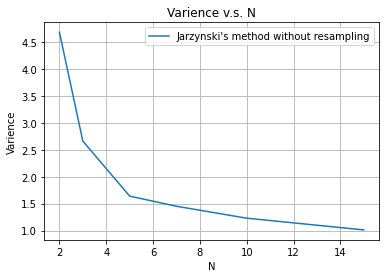

In [14]:
plt.plot(N_list, variance_list, label = "Jarzynski's method without resampling")
plt.title('Varience v.s. N')
plt.xlabel('N')
plt.ylabel('Varience')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("VvsN1.png")
files.download("VvsN1.png")
plt.show()

In [4]:
def systematic(W): # systematic resampling (could also use other resampling methods)
    N = len(W)
    unif = (np.random.random() + np.arange(N)) / N
    indexes = np.zeros(N, 'i')
    cumulative_W = np.cumsum(W)
    i, j = 0, 0
    while i < N:
        if unif[i] < cumulative_W[j]:
            indexes[i] = j
            i += 1
        else:
            j += 1
    return indexes

In [13]:
# evaluate variance without resampling
L = 5
beta = 0.2
N_list = [2, 3, 5, 7, 10, 15] # list of N
M = 100 # number of samples in ensemble
sample = 500 # number of runs to calculate the variance

variance_list2 = []
for N in tqdm.tqdm(N_list):
  data2 = [Jarzynski(L, beta, N, M, resample = True) for j in range(sample)]
  variance_list2.append(np.var(data2))

100%|██████████| 6/6 [23:42<00:00, 237.04s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

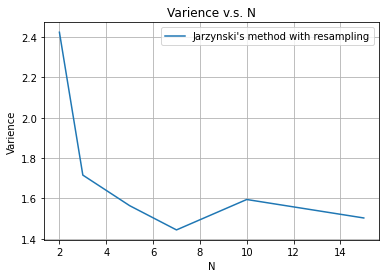

In [14]:
plt.plot(N_list, variance_list2, label = "Jarzynski's method with resampling")
plt.title('Varience v.s. N')
plt.xlabel('N')
plt.ylabel('Varience')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("VvsN2.png")
files.download("VvsN2.png")
plt.show()

In [6]:
def Jarzynski_Gibbs(L, beta, N, M, resample = False):
  ensemble = [Ising(L) for i in range(M)] # generate samples from beta=0
  W = np.ones(M)/M
  for k in range(N): # loop over interpolation steps
    for i in range(M): # loop over the sample
      for j in range(L*L): # to accelerate muxing, update L*L times
        ensemble[i] = flip(ensemble[i], beta*k/N, np.random.randint(0, L), np.random.randint(0, L))
      W[i] *= density(ensemble[i], beta/N)
    W /= np.sum(W) # normalizing weight
    if resample == True:
      index = systematic(W)
      ensemble_new = [ensemble[i] for i in index]
      ensemble = ensemble_new
      W = np.ones(M)/M
  magne = [np.sum(A) for A in ensemble]
  return np.dot(W, magne) # compute the weighted average of magnetization using ensemble

In [7]:
# evaluate variance without resampling
L = 5
beta = 0.2
N_list = [2, 3, 5, 7, 10, 15] # list of N
M = 100 # number of samples in ensemble
sample = 500 # number of runs to calculate the variance

variance_list3 = []
for N in tqdm.tqdm(N_list):
  data3 = [Jarzynski_Gibbs(L, beta, N, M, resample = False) for j in range(sample)]
  variance_list3.append(np.var(data3))

100%|██████████| 6/6 [21:44<00:00, 217.49s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

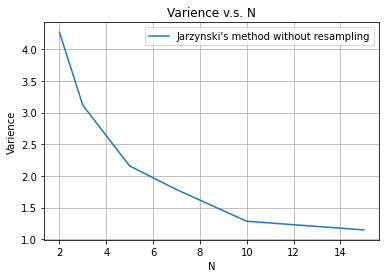

In [10]:
plt.plot(N_list, variance_list3, label = "Jarzynski's method without resampling")
plt.title('Varience v.s. N')
plt.xlabel('N')
plt.ylabel('Varience')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("VvsN3.png")
files.download("VvsN3.png")
plt.show()

In [11]:
# evaluate variance without resampling
L = 5
beta = 0.2
N_list = [2, 3, 5, 7, 10, 15] # list of N
M = 100 # number of samples in ensemble
sample = 500 # number of runs to calculate the variance

variance_list4 = []
for N in tqdm.tqdm(N_list):
  data4 = [Jarzynski_Gibbs(L, beta, N, M, resample = True) for j in range(sample)]
  variance_list4.append(np.var(data4))

100%|██████████| 6/6 [21:42<00:00, 217.15s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

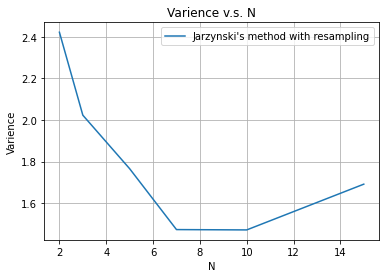

In [12]:
plt.plot(N_list, variance_list4, label = "Jarzynski's method with resampling")
plt.title('Varience v.s. N')
plt.xlabel('N')
plt.ylabel('Varience')
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.savefig("VvsN4.png")
files.download("VvsN4.png")
plt.show()